In [16]:
import time
import numpy as np
import pandas as pd
import tushare as ts
from talib.abstract import *

import matplotlib.pyplot as plt

In [17]:
#import os
#os.chdir('/Users/xupech/Downloads/Final Project/Data')

In [280]:
# Read in all bond index, currency, energy and metals and VIX data and use them as features to predict movement of the equity market.
bi = pd.read_csv('clean_bondindex.csv')
cur = pd.read_csv('clean_currency.csv')
em = pd.read_csv('clean_energy_metals.csv')
vix = pd.read_csv('VIX.csv')

In [283]:
# Combine all external data together into 1 dataframe.
ext_dt1 = bi.merge(cur, left_on='Date', right_on='Date') \
           .merge(em, left_on='Date', right_on='Date')

ext_dt = ext_dt1.iloc[::-1].reset_index(drop=True)

ext_dt.Date = pd.to_datetime(ext_dt.Date,format="%Y%m%d")

vix.Date = pd.to_datetime(vix.Date)
vix = vix.rename(columns={"Close": "vix"})

ext_dt = ext_dt.merge(vix, left_on = 'Date', right_on = 'Date')
ext_dt=ext_dt.drop(columns=['Open', 'High', 'Low','Adj Close', 'Volume'])

In [284]:
ext_dt.head()

,Date,US High Yied,US Investment Grade,Emerging Investment Grade,Emerging High Yield OAS,Emerging Investment Grade OAS,US High Yield OAS,US Investment Grade OAS,US 10 Year -2 Year Gov Spread,USDZAR BGN Curncy (L4),...,GBPUSD Curncy (R2),EURUSD Curncy (L1),Crude Oil,Natural Gas,Aluminum,Copper,Gold,Nickel,Silver,vix
0,2014-05-08,1644.7900,155.92,399.8752,5.94,1.94,3.47,1.052857,222.519,10.3359,...,1.6932,1.3840,100.26,5.034,1766.5,6729.0,1289.43,19405.0,19.1900,13.43
1,2014-05-09,1645.1899,155.66,400.3427,5.87,1.91,3.47,1.053333,223.631,10.3481,...,1.6851,1.3758,99.99,5.064,1761.5,6745.0,1288.91,19905.0,19.1696,12.92
2,2014-05-12,1646.8600,155.45,400.0514,5.86,1.89,3.42,1.053810,226.212,10.3580,...,1.6868,1.3757,100.59,5.034,1787.0,6879.0,1295.80,20925.0,19.5424,12.23
3,2014-05-13,1648.1500,155.79,401.0304,5.88,1.88,3.44,1.054286,222.591,10.3089,...,1.6826,1.3704,101.70,5.029,1781.0,6845.0,1293.63,21000.0,19.5400,12.13
4,2014-05-14,1649.3300,156.53,402.2607,5.89,1.90,3.47,1.054762,217.172,10.2914,...,1.6767,1.3715,102.37,5.052,1809.0,6920.0,1305.97,20030.0,19.7929,12.17


In [285]:
# Read in SP500 Data.
df = pd.read_csv('./S&P_500.csv').iloc[:1500].iloc[::-1]
df.Date = pd.to_datetime(df.Date,format="%m/%d/%Y")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1499,2014-01-28,1783.000000,1793.869995,1779.489990,1792.500000,1792.500000,3437830000
1498,2014-01-29,1790.150024,1790.150024,1770.449951,1774.199951,1774.199951,3964020000
1497,2014-01-30,1777.170044,1798.770020,1777.170044,1794.189941,1794.189941,3547510000
1496,2014-01-31,1790.880005,1793.880005,1772.260010,1782.589966,1782.589966,4059690000
1495,2014-02-03,1782.680054,1784.829956,1739.660034,1741.890015,1741.890015,4726040000


In [286]:
# Merge SP500 Data with external data.
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']] \
     .merge(ext_dt, left_on='Date', right_on='Date')
df.Volume = df.Volume.astype('double')

In [288]:
df.head()

,Date,Open,High,Low,Close,Volume,US High Yied,US Investment Grade,Emerging Investment Grade,Emerging High Yield OAS,...,GBPUSD Curncy (R2),EURUSD Curncy (L1),Crude Oil,Natural Gas,Aluminum,Copper,Gold,Nickel,Silver,vix
0,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,3.393420e+09,1644.7900,155.92,399.8752,5.94,...,1.6932,1.3840,100.26,5.034,1766.5,6729.0,1289.43,19405.0,19.1900,13.43
1,2014-05-09,1875.270020,1878.569946,1867.020020,1878.479980,3.025020e+09,1645.1899,155.66,400.3427,5.87,...,1.6851,1.3758,99.99,5.064,1761.5,6745.0,1288.91,19905.0,19.1696,12.92
2,2014-05-12,1880.030029,1897.130005,1880.030029,1896.650024,3.005740e+09,1646.8600,155.45,400.0514,5.86,...,1.6868,1.3757,100.59,5.034,1787.0,6879.0,1295.80,20925.0,19.5424,12.23
3,2014-05-13,1896.750000,1902.170044,1896.060059,1897.449951,2.915680e+09,1648.1500,155.79,401.0304,5.88,...,1.6826,1.3704,101.70,5.029,1781.0,6845.0,1293.63,21000.0,19.5400,12.13
4,2014-05-14,1897.130005,1897.130005,1885.770020,1888.530029,2.822060e+09,1649.3300,156.53,402.2607,5.89,...,1.6767,1.3715,102.37,5.052,1809.0,6920.0,1305.97,20030.0,19.7929,12.17


In [289]:
# Define inputs to be used by talib.
inputs = {
    'open': df.Open.values,
    'high': df.High.values,
    'low': df.Low.values,
    'close': df.Close.values,
    'volume': df.Volume.values
}

inputs.update(
    {key: df[key].values for key in df.columns[6:]}
)



In [290]:
# Use all technical indicators in talib for reference.
def ta_indicators(inputs):
    TAI_DICT = {
        'AD': AD(inputs),
        'ADD': ADD(inputs),
        'ATAN': ATAN(inputs),
        'AVGPRICE': AVGPRICE(inputs),
        'BOP': BOP(inputs),
        'CDL2CROWS': CDL2CROWS(inputs),
        'CDL3BLACKCROWS': CDL3BLACKCROWS(inputs),
        'CDL3INSIDE': CDL3INSIDE(inputs),
        'CDL3LINESTRIKE': CDL3LINESTRIKE(inputs),
        'CDL3OUTSIDE': CDL3OUTSIDE(inputs),
        'CDL3STARSINSOUTH': CDL3STARSINSOUTH(inputs),
        'CDL3WHITESOLDIERS': CDL3WHITESOLDIERS(inputs),
        'CDLADVANCEBLOCK': CDLADVANCEBLOCK(inputs),
        'CDLBELTHOLD': CDLBELTHOLD(inputs),
        'CDLBREAKAWAY': CDLBREAKAWAY(inputs),
        'CDLCLOSINGMARUBOZU': CDLCLOSINGMARUBOZU(inputs),
        'CDLCONCEALBABYSWALL': CDLCONCEALBABYSWALL(inputs),
        'CDLCOUNTERATTACK': CDLCOUNTERATTACK(inputs),
        'CDLDOJI': CDLDOJI(inputs),
        'CDLDOJISTAR': CDLDOJISTAR(inputs),
        'CDLDRAGONFLYDOJI': CDLDRAGONFLYDOJI(inputs),
        'CDLENGULFING': CDLENGULFING(inputs),
        'CDLGAPSIDESIDEWHITE': CDLGAPSIDESIDEWHITE(inputs),
        'CDLGRAVESTONEDOJI': CDLGRAVESTONEDOJI(inputs),
        'CDLHAMMER': CDLHAMMER(inputs),
        'CDLHANGINGMAN': CDLHANGINGMAN(inputs),
        'CDLHARAMI': CDLHARAMI(inputs),
        'CDLHARAMICROSS': CDLHARAMICROSS(inputs),
        'CDLHIGHWAVE': CDLHIGHWAVE(inputs),
        'CDLHIKKAKE': CDLHIKKAKE(inputs),
        'CDLHIKKAKEMOD': CDLHIKKAKEMOD(inputs),
        'CDLHOMINGPIGEON': CDLHOMINGPIGEON(inputs),
        'CDLIDENTICAL3CROWS': CDLIDENTICAL3CROWS(inputs),
        'CDLINNECK': CDLINNECK(inputs),
        'CDLINVERTEDHAMMER': CDLINVERTEDHAMMER(inputs),
        'CDLKICKING': CDLKICKING(inputs),
        'CDLKICKINGBYLENGTH': CDLKICKINGBYLENGTH(inputs),
        'CDLLADDERBOTTOM': CDLLADDERBOTTOM(inputs),
        'CDLLONGLEGGEDDOJI': CDLLONGLEGGEDDOJI(inputs),
        'CDLLONGLINE': CDLLONGLINE(inputs),
        'CDLMARUBOZU': CDLMARUBOZU(inputs),
        'CDLMATCHINGLOW': CDLMATCHINGLOW(inputs),
        'CDLONNECK': CDLONNECK(inputs),
        'CDLPIERCING': CDLPIERCING(inputs),
        'CDLRICKSHAWMAN': CDLRICKSHAWMAN(inputs),
        'CDLRISEFALL3METHODS': CDLRISEFALL3METHODS(inputs),
        'CDLSEPARATINGLINES': CDLSEPARATINGLINES(inputs),
        'CDLSHOOTINGSTAR': CDLSHOOTINGSTAR(inputs),
        'CDLSHORTLINE': CDLSHORTLINE(inputs),
        'CDLSPINNINGTOP': CDLSPINNINGTOP(inputs),
        'CDLSTALLEDPATTERN': CDLSTALLEDPATTERN(inputs),
        'CDLSTICKSANDWICH': CDLSTICKSANDWICH(inputs),
        'CDLTAKURI': CDLTAKURI(inputs),
        'CDLTASUKIGAP': CDLTASUKIGAP(inputs),
        'CDLTHRUSTING': CDLTHRUSTING(inputs),
        'CDLTRISTAR': CDLTRISTAR(inputs),
        'CDLUNIQUE3RIVER': CDLUNIQUE3RIVER(inputs),
        'CDLUPSIDEGAP2CROWS': CDLUPSIDEGAP2CROWS(inputs),
        'CDLXSIDEGAP3METHODS': CDLXSIDEGAP3METHODS(inputs),
        'CEIL': CEIL(inputs),
        'COS': COS(inputs),
        'COSH': COSH(inputs),

        'ATR': ATR(inputs, timeperiod=14),
        'BETA': BETA(inputs, timeperiod=5),
        'CCI': CCI(inputs, timeperiod=14),
        'CMO': CMO(inputs, timeperiod=14),
        'CORREL': CORREL(inputs, timeperiod=30),
        'ADX': ADX(inputs, timeperiod=14),
        'ADXR': ADXR(inputs, timeperiod=14),
        'AROONOSC': AROONOSC(inputs, timeperiod=14),
        'ADOSC': ADOSC(inputs, fastperiod=3, slowperiod=10),
        'APO': APO(inputs, fastperiod=12, slowperiod=26, matype=0),
        
        'MFI': MFI(inputs, timeperiod=14),
        'MINUS_DI' : MINUS_DI(inputs, timeperiod=14),
        'MINUS_DM' : MINUS_DM(inputs, timeperiod=14),
        'MOM' : MOM(inputs, timeperiod=10),
        'PLUS_DI' : PLUS_DI(inputs, timeperiod=14),
        'PLUS_DM' : PLUS_DM(inputs, timeperiod=14),
        'PRO' : PPO(inputs, fastperiod=12, slowperiod=26, matype=0),
        'ROC' : ROC(inputs, timeperiod=10),
        'ROCP' : ROCP(inputs, timeperiod=10),
        'ROCR' : ROCR(inputs, timeperiod=10),
        'ROCR100' : ROCR100(inputs, timeperiod=10),
        'RSI' : RSI(inputs, timeperiod=14),
        'TRIX' : TRIX(inputs, timeperiod=30),
        'ULTOSC' :ULTOSC(inputs, timeperiod1=7, timeperiod2=14, timeperiod3=28),
        'WILLR' : WILLR(inputs, timeperiod=14),
        
        'DEMA': DEMA(inputs, timeperiod=30),
        'EMA' : EMA(inputs, timeperiod=30),
        'HT_TRENDLINE' : HT_TRENDLINE(inputs),
        'KAMA' : KAMA(inputs, timeperiod=30),
        'MA' : MA(inputs, timeperiod=30, matype=0),
        'MIDPOINT' : MIDPOINT(inputs, timeperiod=14),
        'MIDPRICE' : MIDPRICE(inputs, timeperiod=14),
        'SAR' : SAR(inputs, acceleration=0, maximum=0),
        'SAREXT' : SAREXT(inputs, startvalue=0, offsetonreverse=0, accelerationinitlong=0,
                      accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, 
                      accelerationshort=0, accelerationmaxshort=0),
        'SMA' : SMA(inputs, timeperiod=30),
        'T3' : T3(inputs, timeperiod=5, vfactor=0),
        'TEMA' : TEMA(inputs, timeperiod=30),
        'TRIMA' : TRIMA(inputs, timeperiod=30),
        'WMA' : WMA(inputs, timeperiod=30),
        
        'OBV' : OBV(inputs),
        'NATR' : NATR(inputs, timeperiod=14),
        'TRANGE' : TRANGE(inputs),
        
        'HT_DCPERIOD' : HT_DCPERIOD(inputs),
        'HT_TRENDMODE' : HT_TRENDMODE(inputs),
        'HT_DCPHASE' : HT_DCPHASE(inputs),
        
        'LINEARREG' : LINEARREG(inputs, timeperiod=14),
        'LINEARREG_ANGLE' : LINEARREG_ANGLE(inputs, timeperiod=14),
        'LINEARREG_INTERCEPT' : LINEARREG_INTERCEPT(inputs, timeperiod=14),
        'LINEARREG_SLOPE' : LINEARREG_SLOPE(inputs, timeperiod=14),
        'STDDEV' : STDDEV(inputs, timeperiod=5, nbdev=1),
        
        'TYPPRICE' : TYPPRICE(inputs),
        'WCLPRICE' : WCLPRICE(inputs),
        
        'SINH' : SINH(inputs),
        'SQRT' : SQRT(inputs),
        'LOG10' : LOG10(inputs),
        
        
        'CDLABANDONEDBABY_0': CDLABANDONEDBABY(inputs, penetration=0),
        'CDLDARKCLOUDCOVER_0': CDLDARKCLOUDCOVER(inputs, penetration=0),
        'CDLEVENINGDOJISTAR_0': CDLEVENINGDOJISTAR(inputs, penetration=0),
        'CDLEVENINGSTAR_0': CDLEVENINGSTAR(inputs, penetration=0),
        'CDLMATHOLD_0': CDLMATHOLD(inputs, penetration=0),
        'CDLMORNINGDOJISTAR_0': CDLMORNINGDOJISTAR(inputs, penetration=0),
        'CDLMORNINGSTAR_0': CDLMORNINGSTAR(inputs, penetration=0),

        'CDLABANDONEDBABY_3': CDLABANDONEDBABY(inputs, penetration=0.3),
        'CDLDARKCLOUDCOVER_3': CDLDARKCLOUDCOVER(inputs, penetration=0.3),
        'CDLEVENINGDOJISTAR_3': CDLEVENINGDOJISTAR(inputs, penetration=0.3),
        'CDLEVENINGSTAR_3': CDLEVENINGSTAR(inputs, penetration=0.3),
        'CDLMATHOLD_3': CDLMATHOLD(inputs, penetration=0.3),
        'CDLMORNINGDOJISTAR_3': CDLMORNINGDOJISTAR(inputs, penetration=0.3),
        'CDLMORNINGSTAR_3': CDLMORNINGSTAR(inputs, penetration=0.3),

        'CDLABANDONEDBABY_5': CDLABANDONEDBABY(inputs, penetration=0.5),
        'CDLDARKCLOUDCOVER_5': CDLDARKCLOUDCOVER(inputs, penetration=0.5),
        'CDLEVENINGDOJISTAR_5': CDLEVENINGDOJISTAR(inputs, penetration=0.5),
        'CDLEVENINGSTAR_5': CDLEVENINGSTAR(inputs, penetration=0.5),
        'CDLMATHOLD_5': CDLMATHOLD(inputs, penetration=0.5),
        'CDLMORNINGDOJISTAR_5': CDLMORNINGDOJISTAR(inputs, penetration=0.5),
        'CDLMORNINGSTAR_5': CDLMORNINGSTAR(inputs, penetration=0.5),
    }

    inphase, quadrature = HT_PHASOR(inputs)
    sine, leadsine = HT_SINE(inputs)
    macd_macd, macd_macdsignal, macd_macdhist = MACD(inputs,fastperiod=12, slowperiod=26,signalperiod=9)
    macdext_macd, macdext_macdsignal, macdext_macdhist = MACDEXT(inputs, fastperiod=12, fastmatype=0, slowperiod=26, 
                                                                 slowmatype=0, signalperiod=9, signalmatype=0)
    macdfix_macd, macdfix_macdsignal, macdfix_macdhist = MACDFIX(inputs, signalperiod=9)
    slowk, slowd = STOCH(inputs, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    fastk, fastd = STOCHF(inputs, fastk_period=5, fastd_period=3, fastd_matype=0)
    fastk_rsi, fastd_rsi = STOCHRSI(inputs, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
    bu, bm, bl = BBANDS(inputs, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
    ad, au = AROON(inputs, timeperiod=14)


    TAI_DICT.update({'BBANDS_UPPERBAND': bu, 'BBANDS_MIDDLEBAND': bm, 'BBANDS_LOWERBAND': bl, 
                     'AROONDOWN': ad, 'AROONUP': au,
                     'HT_PHASOR_INPHASE': inphase, 'HT_PHASOR_QUADRATURE': quadrature,
                     'HT_SINE_SINE': sine, 'HT_SINE_SINE': leadsine,
                     'MACD_MACD': macd_macd, 'MACD_MACDSIGNAL': macd_macdsignal, 'MACD_MACDHIS': macd_macdhist,
                     'MACDEXT_MACD': macdext_macd, 'MACDEXT_MACDSIGNAL': macdext_macdsignal, 'MACDEXT_MACDHIS': macdext_macdhist,
                     'MACDFIX_MACD': macdfix_macd, 'MACDFIX_MACDSIGNAL': macdfix_macdsignal, 'MACDFIX_MACDHIS': macdfix_macdhist,
                     'STOCH_SLOWK': slowk, 'STOCH_SLOWD': slowd,
                     'STOCHF_FASTK': fastk, 'STOCHF_FASTD': fastd, 
                     'STOCHRSI_FASTK': fastk_rsi, 'STOCHRSI_FASTD': fastd_rsi
    })

    return TAI_DICT

In [291]:
# Calculate all technical indicators.
TAI_DICT = ta_indicators(inputs)

In [292]:
# Concatenate all technical indicators with inputs.
df_inputs = pd.concat([pd.DataFrame(inputs), pd.DataFrame(TAI_DICT)], axis=1)
for col in df_inputs.columns:
    if len(np.unique(df_inputs[col].dropna())) == 1:
        df_inputs.drop(columns=col, inplace=True)

# Calculate future 1-day return for prediction purpose.
df_inputs['ret'] = (-(df['Close'] - df['Close'].shift(-1)) \
                        / df['Close'] * 100)

df_inputs['ret'] = df_inputs['ret'] * 1.0

df_inputs.dropna(inplace=True)

In [293]:
df_inputs.tail(15)

,open,high,low,close,volume,US High Yied,US Investment Grade,Emerging Investment Grade,Emerging High Yield OAS,Emerging Investment Grade OAS,...,MACDFIX_MACD,MACDFIX_MACDSIGNAL,MACDFIX_MACDHIS,STOCH_SLOWK,STOCH_SLOWD,STOCHF_FASTK,STOCHF_FASTD,STOCHRSI_FASTK,STOCHRSI_FASTD,ret
1403,3195.209961,3198.479980,3191.139893,3191.139893,4.014080e+09,2177.1399,199.80,517.5536,6.13,1.28,...,27.895524,24.981342,2.914182,90.086717,86.621694,87.768562,90.086717,85.620661,95.206887,0.445929
1404,3192.320068,3205.479980,3192.320068,3205.370117,3.720450e+09,2177.8899,200.15,517.4388,6.14,1.29,...,29.304694,25.846012,3.458681,92.925470,89.666777,99.775652,92.925470,100.000000,95.206887,0.494478
1405,3223.330078,3225.649902,3216.030029,3221.219971,6.454270e+09,2178.6101,200.12,517.3977,6.10,1.29,...,31.271714,26.931153,4.340562,92.333928,91.782038,89.457570,92.333928,100.000000,95.206887,0.086614
1406,3226.050049,3227.780029,3222.300049,3224.010010,3.060610e+09,2180.3601,199.91,517.3531,6.07,1.28,...,32.675730,28.080068,4.595662,92.991556,92.750318,89.741445,92.991556,100.000000,100.000000,-0.019545
1407,3225.449951,3226.429932,3220.510010,3223.379883,1.296540e+09,2180.3999,200.32,517.9283,6.04,1.29,...,33.364777,29.137010,4.227767,89.063309,91.462931,87.990912,89.063309,94.079413,98.026471,0.512817
1408,3227.199951,3240.080078,3227.199951,3239.909912,2.160680e+09,2181.4500,200.39,517.7055,6.01,1.30,...,34.770938,30.263795,4.507142,92.458688,91.504518,99.643706,92.458688,100.000000,98.026471,0.003398
1409,3247.229980,3247.929932,3234.370117,3240.020020,2.428670e+09,2182.6299,200.96,518.5014,6.00,1.31,...,35.493617,31.309760,4.183857,87.612860,89.711619,75.203962,87.612860,100.000000,98.026471,-0.578082
1410,3240.090088,3240.919922,3216.570068,3221.290039,3.013290e+09,2182.4299,200.73,518.4400,6.11,1.31,...,34.257771,31.899362,2.358409,63.299554,81.123701,15.050993,63.299554,0.000000,66.666667,0.294602
1411,3215.179932,3231.719971,3212.030029,3230.780029,2.893810e+09,2182.7700,200.47,518.2479,6.10,1.29,...,33.612437,32.241977,1.370460,47.494503,66.135639,52.228553,47.494503,20.298612,40.099537,0.837880
1412,3244.669922,3258.139893,3235.530029,3257.850098,3.458250e+09,2185.3301,200.83,518.5089,6.04,1.31,...,34.757159,32.745013,2.012145,55.550353,55.448137,99.371512,55.550353,69.305064,29.867892,-0.705987


In [234]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout
from tensorflow.keras.models import Sequential

In [235]:
train_per = 0.82

# Define X variables and y variables.
X = df_inputs[df_inputs.columns[:-1]].values
y = df_inputs[df_inputs.columns[-1]].values

num_feature = X.shape[1]
print('number of features: ', num_feature)

# Break data into training and test subsets.
train_size = int(len(X) * train_per)
test_size = len(X) - train_size
X_train_set, X_test_set = X[0:train_size,:], X[train_size:len(X),:]
y_train_set, y_test_set = y[0:train_size], y[train_size:len(y)]

print('length of X_train_set: %s\nlength of X_test_set: %s'%(len(X_train_set), len(X_test_set)))

# Fit standard scaler to X variables.
scaler = StandardScaler().fit(X_train_set)
X_train_set = scaler.transform(X_train_set)
X_test_set = scaler.transform(X_test_set)

# Collapse 195 features to 60 PCs by pca method.
pc = 60
pca = PCA(n_components=pc, svd_solver='full')
pca.fit(X_train_set)

X_train_set = pca.transform(X_train_set)
X_test_set = pca.transform(X_test_set)

print('number of PCs: ', pc)
print(sum(pca.explained_variance_ratio_[:pc]))

number of features:  195
length of X_train_set: 1090
length of X_test_set: 240
number of PCs:  60
0.956329372253737


## 1. First Model.

In [294]:
# Define models to look 60 days behind.
need_num = 60
# Define significant price movement to be more than 0.5% and only train on price > 0.5%.
band_w = 0.5

y_train = np.asarray(y_train_set[need_num:])
y_test = np.asarray(y_test_set[need_num:])

# Evaluate if daily return > 0.5%, if yes, pull 60 days data before as X variables.
X_train = []
for i in range(need_num, len(X_train_set)):
    if abs(y_train[i-need_num]) > band_w:
        X_train.append(X_train_set[i-need_num:i])
y_train = y_train[abs(y_train) > band_w] 

X_train = np.asarray(np.array(X_train))
input_shape = X_train.shape
print('shape of X_train: (%s, %s, %s)'%input_shape)

X_test = []
for i in range(need_num, len(X_test_set)):
    if abs(y_test[i-need_num]) > band_w:
        X_test.append(X_test_set[i-need_num:i])
X_test = np.asarray(np.array(X_test))
y_test = y_test[abs(y_test) > band_w] 
print('shape of X_test: (%s, %s, %s)'%X_test.shape)


print('shape of y_train: (%s,)'%y_train.shape)
print('shape of y_test: (%s,)'%y_test.shape)

shape of X_train: (425, 60, 60)
shape of X_test: (80, 60, 60)
shape of y_train: (425,)
shape of y_test: (80,)


In [297]:
# Build an LSTM Model.
dropout_rate = 0.45

model = Sequential()

model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(rate=dropout_rate))
model.add(LSTM(units=8, return_sequences=False))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=8))
model.add(Activation("relu"))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=1))
model.add(Activation("linear"))
rms=optimizers.RMSprop(lr=2e-3, rho=0.9, epsilon=1e-06)

start = time.time()
model.compile(loss="mse", optimizer=rms)
print ('compilation time : ', time.time() - start)

# Fit model to training data.
model.fit(x=X_train, y=(y_train), epochs=100, batch_size=30)

compilation time :  0.0004520416259765625
Train on 425 samples
Epoch 1/100
425/425 [==============================] - 3s 8ms/sample - loss: 1.9666
Epoch 2/100
425/425 [==============================] - 1s 2ms/sample - loss: 1.8762
Epoch 3/100
425/425 [==============================] - 1s 2ms/sample - loss: 1.8905
Epoch 4/100
425/425 [==============================] - 1s 2ms/sample - loss: 1.8196
Epoch 5/100
425/425 [==============================] - 1s 2ms/sample - loss: 1.7908
Epoch 6/100
425/425 [==============================] - 1s 2ms/sample - loss: 1.7747
Epoch 7/100
425/425 [==============================] - 1s 2ms/sample - loss: 1.8087
Epoch 8/100
425/425 [==============================] - 1s 2ms/sample - loss: 1.8266
Epoch 9/100
425/425 [==============================] - 1s 2ms/sample - loss: 1.7379
Epoch 10/100
425/425 [==============================] - 1s 2ms/sample - loss: 1.7918
Epoch 11/100
425/425 [==============================] - 1s 2ms/sample - loss: 1.7836
Epoch 12/10

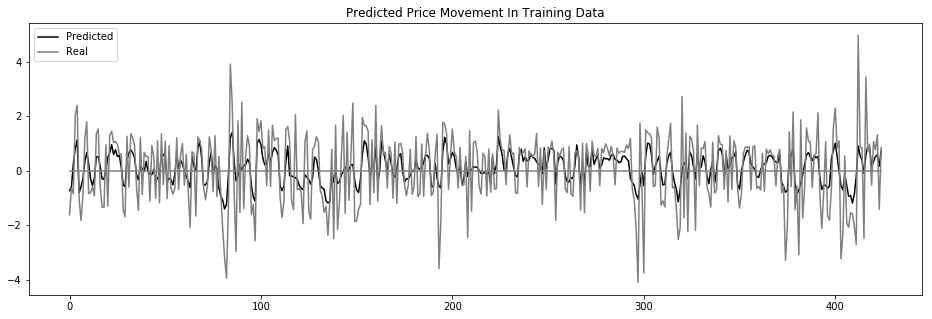

In [298]:
# Plot how model fits to training data.
plt.subplots(figsize=(16,5))
plt.plot(range(y_train.shape[0]), model.predict(x=X_train).reshape(-1), label='Predicted', c='black')
plt.plot(range(y_train.shape[0]), y_train, label='Real', c='gray')
plt.plot(range(y_train.shape[0]), [0]*len(y_train), c='gray')
plt.title('Predicted Price Movement In Training Data')
plt.legend()
plt.show()

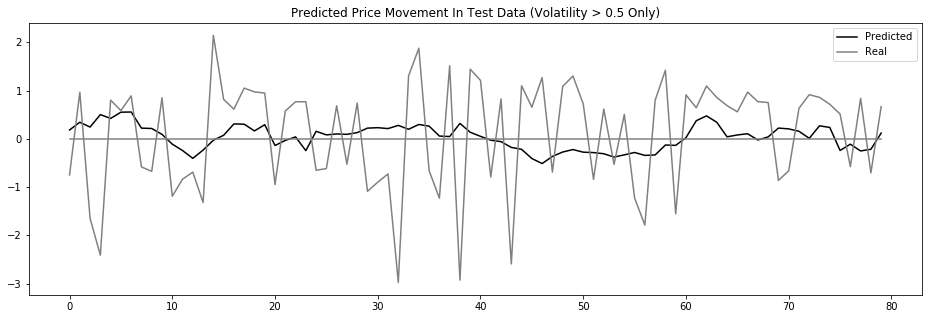

In [300]:
# Plot how model fits test data.
y_pred = model.predict(x=X_test).reshape(-1)
plt.subplots(figsize=(16,5))
plt.plot(range(y_test.shape[0]), y_pred, label='Predicted', c='black')
plt.plot(range(y_test.shape[0]), y_test, label='Real', c='gray')
plt.plot(range(y_test.shape[0]), [0]*len(y_test), c='gray')
plt.title('Predicted Price Movement In Test Data (Volatility > 0.5 Only)')
plt.legend()
plt.show()

## 2. Second Model.

In [301]:
# Same input variables, prediction on y directions only.
ytrain_sign = np.sign(y_train)
ytest_sign = np.sign(y_test)

In [304]:
# Again LSTM model, however define loss function = binary crossentropy.
dropout_rate = 0.45

model = Sequential()

model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(rate=dropout_rate))
model.add(LSTM(units=8, return_sequences=False))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=8))
model.add(Activation("relu"))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=1))
model.add(Activation("linear"))
rms=optimizers.RMSprop(lr=2e-3, rho=0.9, epsilon=1e-06)

start = time.time()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('compilation time : ', time.time() - start)

model.fit(x=X_train, y=(ytrain_sign), epochs=100, batch_size=30)
# Accuracy terrible, drop this method.

compilation time :  0.000553131103515625
Train on 425 samples
Epoch 1/100
425/425 [==============================] - 3s 7ms/sample - loss: 7.0188 - accuracy: 0.4471
Epoch 2/100
425/425 [==============================] - 1s 1ms/sample - loss: 6.5699 - accuracy: 0.4471
Epoch 3/100
425/425 [==============================] - 1s 1ms/sample - loss: 6.0363 - accuracy: 0.4588
Epoch 4/100
425/425 [==============================] - 1s 2ms/sample - loss: 5.5869 - accuracy: 0.4447
Epoch 5/100
425/425 [==============================] - 1s 2ms/sample - loss: 5.7054 - accuracy: 0.4518
Epoch 6/100
425/425 [==============================] - 1s 2ms/sample - loss: 4.6419 - accuracy: 0.4659
Epoch 7/100
425/425 [==============================] - 1s 1ms/sample - loss: 4.4082 - accuracy: 0.4494
Epoch 8/100
425/425 [==============================] - 1s 1ms/sample - loss: 3.3139 - accuracy: 0.4753
Epoch 9/100
425/425 [==============================] - 1s 2ms/sample - loss: 3.3383 - accuracy: 0.4706
Epoch 10/10

## 3. Third Model.

In [305]:
# 1 day features to predict price movement instead 60 days.
need_num = 1
band_w = 0.5

y_train = np.asarray(y_train_set[need_num:])
y_test = np.asarray(y_test_set[need_num:])
X_train = []
for i in range(need_num, len(X_train_set)):
    if abs(y_train[i-need_num]) > band_w:
        X_train.append(X_train_set[i-need_num:i])
y_train = y_train[abs(y_train) > band_w] 

X_train = np.asarray(np.array(X_train))
input_shape = X_train.shape
print('shape of X_train: (%s, %s, %s)'%input_shape)

X_test = []
for i in range(need_num, len(X_test_set)-1):
    if abs(y_test[i-need_num]) > band_w:
        X_test.append(X_test_set[i-need_num:i])
X_test = np.asarray(np.array(X_test))
y_test = y_test[abs(y_test) > band_w] 
print('shape of X_test: (%s, %s, %s)'%X_test.shape)


print('shape of y_train: (%s,)'%y_train.shape)
print('shape of y_test: (%s,)'%y_test.shape)

shape of X_train: (455, 1, 60)
shape of X_test: (100, 1, 60)
shape of y_train: (455,)
shape of y_test: (100,)


In [306]:
# Reshape to 2-d array fit random forest model.
X_train= X_train.reshape(455, 60)
X_test= X_test.reshape(100, 60)

# Prediction on y directions only.
ytrain_sign = np.sign(y_train)
ytest_sign = np.sign(y_test)

ytrain_sign= ytrain_sign>0
ytest_sign= ytest_sign>0

## 4. Fourth Model.

In [307]:
# Random forest method and search for best parameters using Grid search.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

score_used ='roc_auc' 
# set up dictionary for grid search
treeSet = np.arange(start=1,stop=60,step=5,dtype=int)
param_grid={'max_features':[40,45,50,55,60],'max_depth':[100,150],'n_estimators':treeSet}

# set up cross-validation shuffles
shuffle_split = ShuffleSplit(test_size=0.75, train_size=0.25, n_splits=25)

# set up search
grid_search = GridSearchCV(RandomForestRegressor(),param_grid,cv=shuffle_split,scoring=score_used,  return_train_score=True)
# implement search
grid_search.fit(X_train,ytrain_sign)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth','param_n_estimators']])

# 50% predictino accuracy, more or less pure guess.

     rank_test_score  mean_test_score param_max_features param_max_depth  \
0                  8         0.499988                 40             100   
1                 37         0.495382                 40             100   
2                119         0.484862                 40             100   
3                 36         0.495570                 40             100   
4                 93         0.489884                 40             100   
5                 81         0.491012                 40             100   
6                 74         0.491761                 40             100   
7                 22         0.497174                 40             100   
8                 52         0.493413                 40             100   
9                104         0.487895                 40             100   
10                59         0.493044                 40             100   
11                58         0.493048                 40             100   
12          

## 5. Fifth Model. 5 day ahead prediction.

In [308]:
df_inputs = pd.concat([pd.DataFrame(inputs), pd.DataFrame(TAI_DICT)], axis=1)
df_inputs = df_inputs
for col in df_inputs.columns:
    if len(np.unique(df_inputs[col].dropna())) == 1:
        df_inputs.drop(columns=col, inplace=True)

# All previous efforts led to no impressive predictions. Switch to 5th day ahead price movement prediction.
df_inputs['close_5']=df['Close'].shift(-5)
df_inputs = df_inputs[:-5]

df_inputs['close_y'] = (-(df_inputs['close'] - df_inputs['close_5']) / df_inputs['close_5'] * 100)
df_inputs['close_y'] = df_inputs['close_y'] * 1.0
df_inputs.dropna(inplace=True)

df_inputs.tail(15)

,open,high,low,close,volume,US High Yied,US Investment Grade,Emerging Investment Grade,Emerging High Yield OAS,Emerging Investment Grade OAS,...,MACDFIX_MACDSIGNAL,MACDFIX_MACDHIS,STOCH_SLOWK,STOCH_SLOWD,STOCHF_FASTK,STOCHF_FASTD,STOCHRSI_FASTK,STOCHRSI_FASTD,close_5,close_y
1399,3141.229980,3176.280029,3138.469971,3168.570068,3.990690e+09,2159.2600,199.25,515.8888,6.38,1.32,...,23.032119,-0.882328,75.958596,76.797887,84.638434,75.958596,100.000000,66.164484,3205.370117,1.148075
1400,3166.649902,3182.679932,3156.510010,3168.800049,3.736870e+09,2163.8101,200.61,517.3730,6.38,1.35,...,23.067778,0.142634,80.320183,77.092787,75.472837,80.320183,100.000000,86.820349,3221.219971,1.627331
1401,3183.629883,3197.709961,3183.629883,3191.449951,4.051790e+09,2167.9500,199.94,517.0582,6.31,1.31,...,23.550613,1.931338,83.790222,80.023000,91.259395,83.790222,100.000000,100.000000,3224.010010,1.009924
1402,3195.399902,3198.219971,3191.030029,3192.520020,3.837540e+09,2172.6001,200.05,517.6997,6.22,1.30,...,24.252796,2.808735,85.988143,83.366183,91.232195,85.988143,100.000000,100.000000,3223.379883,0.957376
1403,3195.209961,3198.479980,3191.139893,3191.139893,4.014080e+09,2177.1399,199.80,517.5536,6.13,1.28,...,24.981342,2.914182,90.086717,86.621694,87.768562,90.086717,85.620661,95.206887,3239.909912,1.505289
1404,3192.320068,3205.479980,3192.320068,3205.370117,3.720450e+09,2177.8899,200.15,517.4388,6.14,1.29,...,25.846012,3.458681,92.925470,89.666777,99.775652,92.925470,100.000000,95.206887,3240.020020,1.069435
1405,3223.330078,3225.649902,3216.030029,3221.219971,6.454270e+09,2178.6101,200.12,517.3977,6.10,1.29,...,26.931153,4.340562,92.333928,91.782038,89.457570,92.333928,100.000000,95.206887,3221.290039,0.002175
1406,3226.050049,3227.780029,3222.300049,3224.010010,3.060610e+09,2180.3601,199.91,517.3531,6.07,1.28,...,28.080068,4.595662,92.991556,92.750318,89.741445,92.991556,100.000000,100.000000,3230.780029,0.209548
1407,3225.449951,3226.429932,3220.510010,3223.379883,1.296540e+09,2180.3999,200.32,517.9283,6.04,1.29,...,29.137010,4.227767,89.063309,91.462931,87.990912,89.063309,94.079413,98.026471,3257.850098,1.058066
1408,3227.199951,3240.080078,3227.199951,3239.909912,2.160680e+09,2181.4500,200.39,517.7055,6.01,1.30,...,30.263795,4.507142,92.458688,91.504518,99.643706,92.458688,100.000000,98.026471,3234.850098,-0.156416


In [309]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout
from tensorflow.keras.models import Sequential

train_per = 0.82

X = df_inputs[df_inputs.columns[:-1]].values
y = df_inputs[df_inputs.columns[-1]].values

num_feature = X.shape[1]
print('number of features: ', num_feature)

train_size = int(len(X) * train_per)
test_size = len(X) - train_size
X_train_set, X_test_set = X[0:train_size,:], X[train_size:len(X),:]
y_train_set, y_test_set = y[0:train_size], y[train_size:len(y)]

print('length of X_train_set: %s\nlength of X_test_set: %s'%(len(X_train_set), len(X_test_set)))

scaler = StandardScaler().fit(X_train_set)
X_train_set = scaler.transform(X_train_set)
X_test_set = scaler.transform(X_test_set)

pc = 60
pca = PCA(n_components=pc, svd_solver='full')
pca.fit(X_train_set)

X_train_set = pca.transform(X_train_set)
X_test_set = pca.transform(X_test_set)

print('number of PCs: ', pc)
print(sum(pca.explained_variance_ratio_[:pc]))



number of features:  196
length of X_train_set: 1087
length of X_test_set: 239
number of PCs:  60
0.9578183296784676


In [310]:
need_num = 60
band_w = 0.5

y_train = np.asarray(y_train_set[need_num:])
y_test = np.asarray(y_test_set[need_num:])


X_train = []
for i in range(need_num, len(X_train_set)):
    if abs(y_train[i-need_num]) > band_w:
        X_train.append(X_train_set[i-need_num:i])
y_train = y_train[abs(y_train) > band_w] 

X_train = np.asarray(np.array(X_train))
input_shape = X_train.shape
print('shape of X_train: (%s, %s, %s)'%input_shape)

X_test = []
for i in range(need_num, len(X_test_set)):
    if abs(y_test[i-need_num]) > band_w:
        X_test.append(X_test_set[i-need_num:i])
X_test = np.asarray(np.array(X_test))
y_test = y_test[abs(y_test) > band_w] 
print('shape of X_test: (%s, %s, %s)'%X_test.shape)


print('shape of y_train: (%s,)'%y_train.shape)
print('shape of y_test: (%s,)'%y_test.shape)

shape of X_train: (715, 60, 60)
shape of X_test: (139, 60, 60)
shape of y_train: (715,)
shape of y_test: (139,)


In [311]:
# Build an LSTM Model.
dropout_rate = 0.45

model = Sequential()

model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(rate=dropout_rate))
model.add(LSTM(units=8, return_sequences=False))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=8))
model.add(Activation("relu"))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=1))
model.add(Activation("linear"))
rms=optimizers.RMSprop(lr=2e-3, rho=0.9, epsilon=1e-06)

start = time.time()
model.compile(loss="mse", optimizer=rms)
print ('compilation time : ', time.time() - start)

# Fit model to training data.
model.fit(x=X_train, y=(y_train), epochs=100, batch_size=30)

compilation time :  0.0005018711090087891
Train on 715 samples
Epoch 1/100
715/715 [==============================] - 4s 6ms/sample - loss: 5.1215
Epoch 2/100
715/715 [==============================] - 1s 2ms/sample - loss: 4.9941
Epoch 3/100
715/715 [==============================] - 1s 2ms/sample - loss: 4.9202
Epoch 4/100
715/715 [==============================] - 1s 1ms/sample - loss: 4.8808
Epoch 5/100
715/715 [==============================] - 1s 2ms/sample - loss: 4.5993
Epoch 6/100
715/715 [==============================] - 1s 2ms/sample - loss: 4.4265
Epoch 7/100
715/715 [==============================] - 1s 2ms/sample - loss: 4.3291
Epoch 8/100
715/715 [==============================] - 2s 2ms/sample - loss: 4.0484
Epoch 9/100
715/715 [==============================] - 1s 2ms/sample - loss: 4.2053
Epoch 10/100
715/715 [==============================] - 1s 2ms/sample - loss: 3.9026
Epoch 11/100
715/715 [==============================] - 1s 2ms/sample - loss: 3.9407
Epoch 12/10

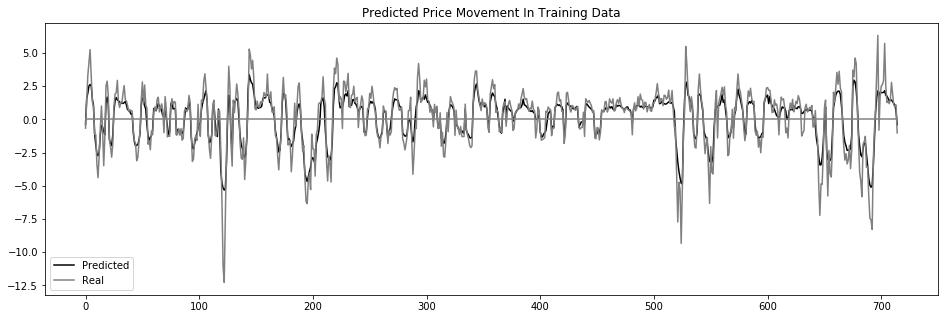

In [312]:
# Plot how model fits to training data.
plt.subplots(figsize=(16,5))
plt.plot(range(y_train.shape[0]), model.predict(x=X_train).reshape(-1), label='Predicted', c='black')
plt.plot(range(y_train.shape[0]), y_train, label='Real', c='gray')
plt.plot(range(y_train.shape[0]), [0]*len(y_train), c='gray')
plt.title('Predicted Price Movement In Training Data')
plt.legend()
plt.show()

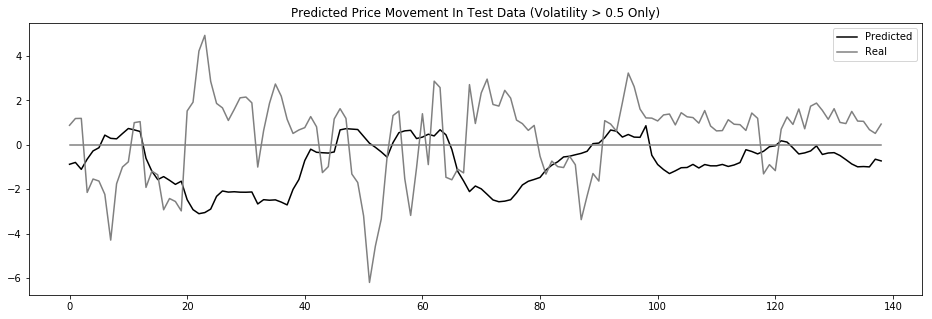

In [313]:
# Plot how model fits test data. Nah, doesn't work well.
y_pred = model.predict(x=X_test).reshape(-1)
plt.subplots(figsize=(16,5))
plt.plot(range(y_test.shape[0]), y_pred, label='Predicted', c='black')
plt.plot(range(y_test.shape[0]), y_test, label='Real', c='gray')
plt.plot(range(y_test.shape[0]), [0]*len(y_test), c='gray')
plt.title('Predicted Price Movement In Test Data (Volatility > 0.5 Only)')
plt.legend()
plt.show()

## 6. Sixth Model.

In [314]:
# Go back to 1 day prediction.
df_inputs = pd.concat([pd.DataFrame(inputs), pd.DataFrame(TAI_DICT)], axis=1)
df_inputs = df_inputs
for col in df_inputs.columns:
    if len(np.unique(df_inputs[col].dropna())) == 1:
        df_inputs.drop(columns=col, inplace=True)


df_inputs['close_y'] = (-(df['Close'] - df['Close'].shift(-1)) \
                        / df['Close'] * 100)

df_inputs['close_y'] = df_inputs['close_y'] * 1.0

df_inputs.dropna(inplace=True)

In [315]:
train_per = 0.82

X = df_inputs[df_inputs.columns[:-1]].values
y = df_inputs[df_inputs.columns[-1]].values

num_feature = X.shape[1]
print('number of features: ', num_feature)

train_size = int(len(X) * train_per)
test_size = len(X) - train_size
X_train_set, X_test_set = X[0:train_size,:], X[train_size:len(X),:]
y_train_set, y_test_set = y[0:train_size], y[train_size:len(y)]

print('length of X_train_set: %s\nlength of X_test_set: %s'%(len(X_train_set), len(X_test_set)))

scaler = StandardScaler().fit(X_train_set)
X_train_set = scaler.transform(X_train_set)
X_test_set = scaler.transform(X_test_set)

pc = 60
pca = PCA(n_components=pc, svd_solver='full')
pca.fit(X_train_set)

X_train_set = pca.transform(X_train_set)
X_test_set = pca.transform(X_test_set)

print('number of PCs: ', pc)
print(sum(pca.explained_variance_ratio_[:pc]))

number of features:  195
length of X_train_set: 1090
length of X_test_set: 240
number of PCs:  60
0.9560921744441505


In [317]:
# Look 5 day before and use 0.7% as a threshold to determine price movement is significant.
need_num = 5
band_w = 0.7

y_train = np.asarray(y_train_set[need_num:])
y_test = np.asarray(y_test_set[need_num:])

X_train = []
for i in range(need_num, len(X_train_set)):
    if abs(y_train[i-need_num]) > band_w:
        X_train.append(X_train_set[i-need_num:i])
y_train = y_train[abs(y_train) > band_w] 

X_train = np.asarray(np.array(X_train))
input_shape = X_train.shape
print('shape of X_train: (%s, %s, %s)'%input_shape)

X_test = []
for i in range(need_num, len(X_test_set)):
    if abs(y_test[i-need_num]) > band_w:
        X_test.append(X_test_set[i-need_num:i])
X_test = np.asarray(np.array(X_test))
y_test = y_test[abs(y_test) > band_w] 
print('shape of X_test: (%s, %s, %s)'%X_test.shape)


print('shape of y_train: (%s,)'%y_train.shape)
print('shape of y_test: (%s,)'%y_test.shape)

shape of X_train: (331, 5, 60)
shape of X_test: (66, 5, 60)
shape of y_train: (331,)
shape of y_test: (66,)


In [319]:
dropout_rate = 0.45

model = Sequential()

model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(rate=dropout_rate))
model.add(LSTM(units=8, return_sequences=False))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=8))
model.add(Activation("relu"))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=1))
model.add(Activation("linear"))
rms=optimizers.RMSprop(lr=2e-3, rho=0.9, epsilon=1e-06)

start = time.time()
model.compile(loss="mse", optimizer=rms)
print ('compilation time : ', time.time() - start)

model.fit(x=X_train, y=(y_train), epochs=100, batch_size=30)

compilation time :  0.0004360675811767578
Train on 331 samples
Epoch 1/100
331/331 [==============================] - 3s 9ms/sample - loss: 2.2877
Epoch 2/100
331/331 [==============================] - 0s 400us/sample - loss: 2.2393
Epoch 3/100
331/331 [==============================] - 0s 330us/sample - loss: 2.2418
Epoch 4/100
331/331 [==============================] - 0s 326us/sample - loss: 2.2257
Epoch 5/100
331/331 [==============================] - 0s 309us/sample - loss: 2.2386
Epoch 6/100
331/331 [==============================] - 0s 293us/sample - loss: 2.3223
Epoch 7/100
331/331 [==============================] - 0s 266us/sample - loss: 2.1847
Epoch 8/100
331/331 [==============================] - 0s 250us/sample - loss: 2.1450
Epoch 9/100
331/331 [==============================] - 0s 319us/sample - loss: 2.2020
Epoch 10/100
331/331 [==============================] - 0s 295us/sample - loss: 2.1871
Epoch 11/100
331/331 [==============================] - 0s 245us/sample - loss

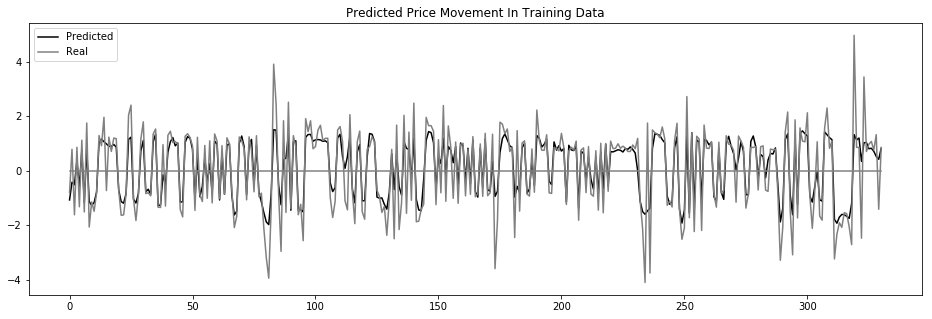

In [320]:
plt.subplots(figsize=(16,5))
plt.plot(range(y_train.shape[0]), model.predict(x=X_train).reshape(-1), label='Predicted', c='black')
plt.plot(range(y_train.shape[0]), y_train, label='Real', c='gray')
plt.plot(range(y_train.shape[0]), [0]*len(y_train), c='gray')
plt.title('Predicted Price Movement In Training Data')
plt.legend()
plt.show()

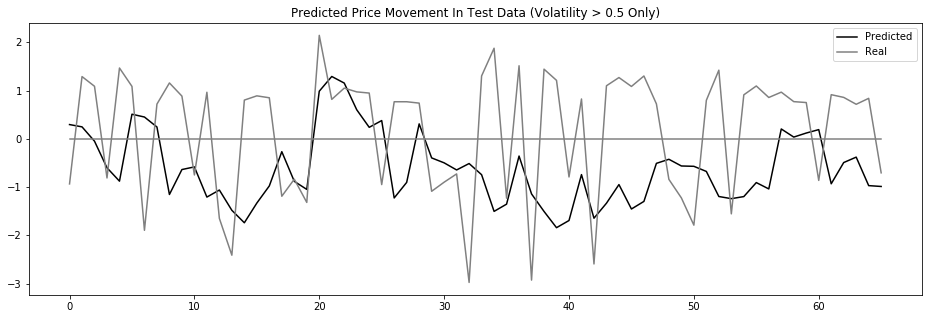

In [321]:
y_pred = model.predict(x=X_test).reshape(-1)
plt.subplots(figsize=(16,5))
plt.plot(range(y_test.shape[0]), y_pred, label='Predicted', c='black')
plt.plot(range(y_test.shape[0]), y_test, label='Real', c='gray')
plt.plot(range(y_test.shape[0]), [0]*len(y_test), c='gray')
plt.title('Predicted Price Movement In Test Data (Volatility > 0.7 Only)')
plt.legend()
plt.show()

## 7. Seventh Model.

In [322]:
# Look 5 day before and use 0.5% again as a threshold to determine price movement is significant.
need_num = 5
band_w = 0.5

y_train = np.asarray(y_train_set[need_num:])
y_test = np.asarray(y_test_set[need_num:])

X_train = []
for i in range(need_num, len(X_train_set)):
    if abs(y_train[i-need_num]) > band_w:
        X_train.append(X_train_set[i-need_num:i])
y_train = y_train[abs(y_train) > band_w] 

X_train = np.asarray(np.array(X_train))
input_shape = X_train.shape
print('shape of X_train: (%s, %s, %s)'%input_shape)

X_test = []
for i in range(need_num, len(X_test_set)):
    if abs(y_test[i-need_num]) > band_w:
        X_test.append(X_test_set[i-need_num:i])
X_test = np.asarray(np.array(X_test))
y_test = y_test[abs(y_test) > band_w] 
print('shape of X_test: (%s, %s, %s)'%X_test.shape)


print('shape of y_train: (%s,)'%y_train.shape)
print('shape of y_test: (%s,)'%y_test.shape)

shape of X_train: (454, 5, 60)
shape of X_test: (98, 5, 60)
shape of y_train: (454,)
shape of y_test: (98,)


In [323]:
dropout_rate = 0.45

model = Sequential()

model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(rate=dropout_rate))
model.add(LSTM(units=8, return_sequences=False))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=8))
model.add(Activation("relu"))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=1))
model.add(Activation("linear"))
rms=optimizers.RMSprop(lr=2e-3, rho=0.9, epsilon=1e-06)

start = time.time()
model.compile(loss="mse", optimizer=rms)
print ('compilation time : ', time.time() - start)

model.fit(x=X_train, y=(y_train), epochs=100, batch_size=30)

compilation time :  0.00044417381286621094
Train on 454 samples
Epoch 1/100
454/454 [==============================] - 3s 7ms/sample - loss: 1.7704
Epoch 2/100
454/454 [==============================] - 0s 271us/sample - loss: 1.7884
Epoch 3/100
454/454 [==============================] - 0s 298us/sample - loss: 1.7780
Epoch 4/100
454/454 [==============================] - 0s 298us/sample - loss: 1.7415
Epoch 5/100
454/454 [==============================] - 0s 292us/sample - loss: 1.6724
Epoch 6/100
454/454 [==============================] - 0s 280us/sample - loss: 1.7129
Epoch 7/100
454/454 [==============================] - 0s 231us/sample - loss: 1.6942
Epoch 8/100
454/454 [==============================] - 0s 254us/sample - loss: 1.7078
Epoch 9/100
454/454 [==============================] - 0s 273us/sample - loss: 1.6765
Epoch 10/100
454/454 [==============================] - 0s 253us/sample - loss: 1.7044
Epoch 11/100
454/454 [==============================] - 0s 250us/sample - los

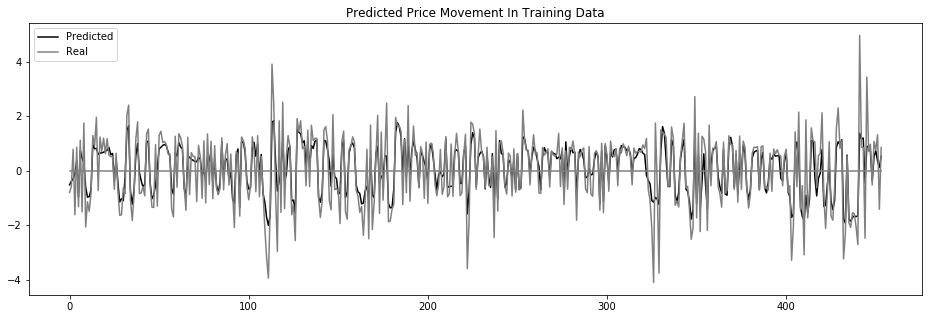

In [324]:
plt.subplots(figsize=(16,5))
plt.plot(range(y_train.shape[0]), model.predict(x=X_train).reshape(-1), label='Predicted', c='black')
plt.plot(range(y_train.shape[0]), y_train, label='Real', c='gray')
plt.plot(range(y_train.shape[0]), [0]*len(y_train), c='gray')
plt.title('Predicted Price Movement In Training Data')
plt.legend()
plt.show()

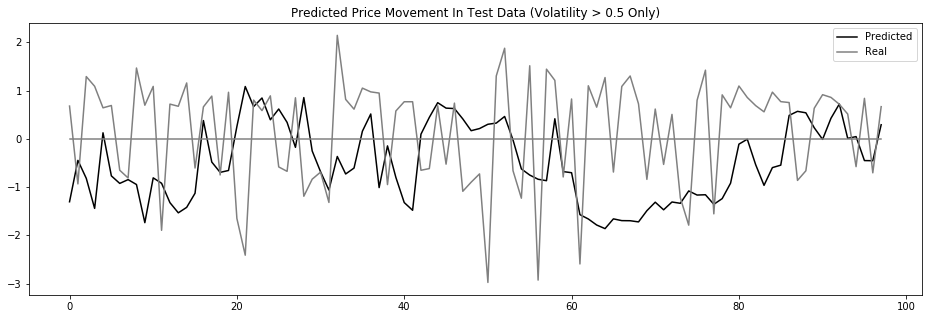

In [325]:
y_pred = model.predict(x=X_test).reshape(-1)
plt.subplots(figsize=(16,5))
plt.plot(range(y_test.shape[0]), y_pred, label='Predicted', c='black')
plt.plot(range(y_test.shape[0]), y_test, label='Real', c='gray')
plt.plot(range(y_test.shape[0]), [0]*len(y_test), c='gray')
plt.title('Predicted Price Movement In Test Data (Volatility > 0.5 Only)')
plt.legend()
plt.show()